In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2

In [21]:
os.listdir('C:/Users/piyalong/Traffic Management/Pedestrains_And_WCG/NewData/')

['.ipynb_checkpoints',
 'Adjusted_testset.csv',
 'Frames_video1',
 'Frames_video1.zip',
 'TAMIDS_Video1_P2_extended.json',
 'via_project_12Apr2023_0h16m_csv.csv']

In [22]:
df=pd.read_csv("C:/Users/piyalong/Traffic Management/Pedestrains_And_WCG/NewData/Adjusted_testset.csv")

In [23]:
df

,Image,ID,X,Y
0,1.jpg,P2-1,813,764
1,1.jpg,P2-2,840,765
2,1.jpg,P2-3,827,963
3,1.jpg,P2-4,832,986
4,1.jpg,P2-5,887,970
...,...,...,...,...
340,31.jpg,P2-18,813,922
341,31.jpg,P2-19,880,1031
342,31.jpg,P2-20,870,1041
343,31.jpg,P2-21,896,1047


In [24]:
grouped = df.groupby('Image')

827 587
841 604
809 715
820 724
839 712
905 943
890 941
828 958


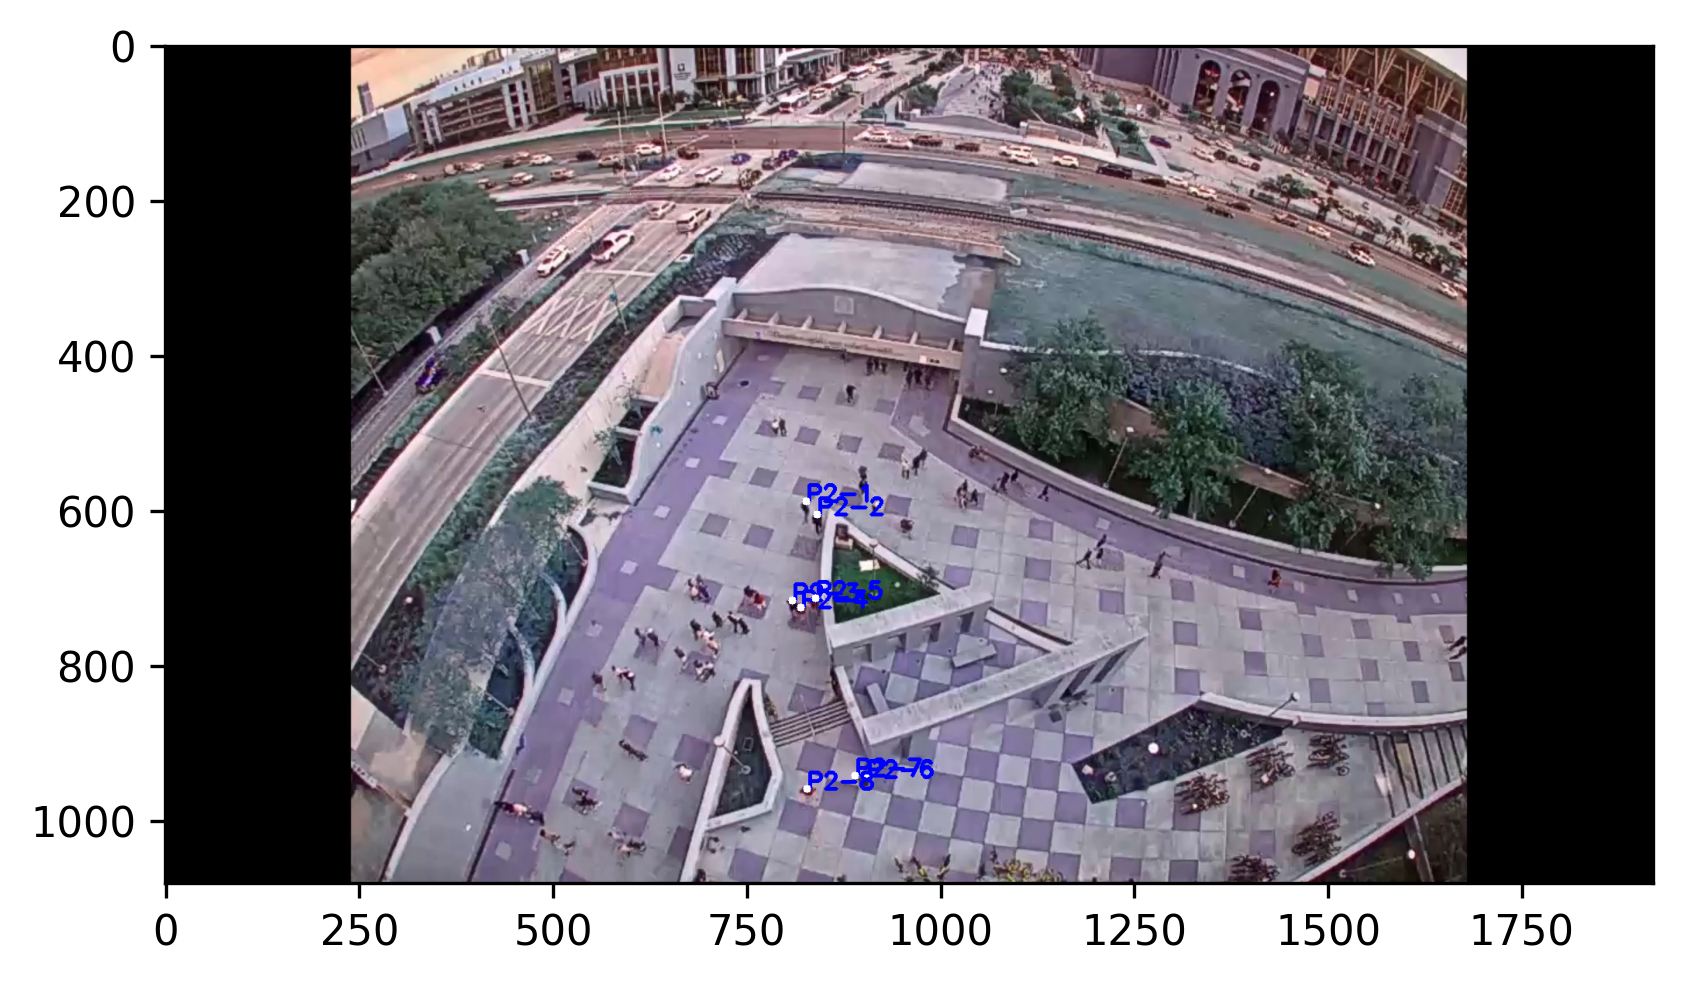

In [30]:
fig, ax = plt.subplots(dpi=300)
frameid=6
img=cv2.imread("NewData/Frames_video1/Frames_video1/{}.jpg".format(frameid))

for _, row in grouped.get_group(str(frameid)+'.jpg').iterrows():
    x, y = int(row['X']), int(row['Y'])
    ID = row['ID']
    print(x,y)
    cv2.putText(img,str(ID), (x,y), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 3)
    cv2.circle(img, (x, y), 5, (255, 255, 255), -1)
plt.imshow(img)


In [31]:
def interpolation(start, stop, step):
    result = [start + (stop-start)/(step)*i for i in range(step)]
    # result.append(stop)
    return result

In [ ]:
import re

# s = "The price of the item is $123.45"
# numbers = re.findall(r'\d+', s)
# print(numbers)

file_path="AllData/1minute video_1.mp4"
video_capture = cv2.VideoCapture(file_path)

fps = int(video_capture.get(cv2.CAP_PROP_FPS))*2

interpolated_frames = []

for object_id, group in df.groupby('ID'):
    print(object_id, group)
    # break
    for i in range(len(group) - 1):
        row1 = group.iloc[i]
        row2 = group.iloc[i + 1]
        
        x1, y1, t1 = row1['X'], row1['Y'], int(re.findall(r'\d+', row1['Image'])[0])
        x2, y2, t2 = row2['X'], row2['Y'], int(re.findall(r'\d+', row2['Image'])[0])
        # t1
        # t2,t1 = [re.findall(r'\d+', t2),re.findall(r'\d+', t1)]

        step = fps
        xs = interpolation(x1, x2, fps)
        ys = interpolation(y1, y2, fps)
        for t, coor in enumerate (zip (xs,ys)):
            x,y=coor
            interpolated_frames.append({'FRAME': (t1-1)*fps+t, 'Object ID': object_id, 'Location X': int(x), 'Location Y': int(y)})


In [56]:
interpolated_df = pd.DataFrame(interpolated_frames)


In [57]:
interpolated_df

,FRAME,Object ID,Location X,Location Y
0,0,P2-1,813,764
1,1,P2-1,813,763
2,2,P2-1,813,762
3,3,P2-1,813,762
4,4,P2-1,813,761
...,...,...,...,...
19075,1675,P2-9,932,417
19076,1676,P2-9,932,417
19077,1677,P2-9,932,416
19078,1678,P2-9,932,416


In [33]:
import matplotlib.pyplot as plt


In [63]:


# file_path='TAMU BCS Animal Example Video/2022 05 25 - TAMU BCS Sample Video GS - GoPro FullHD 1920x1080 30fps.MP4'

video_capture = cv2.VideoCapture(file_path)
w = int(video_capture.get(3))
h = int(video_capture.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(file_path[:-4]+'_visualization.avi', fourcc, fps, (w, h))

# fps=15


frame_number=0
while True:
    ret, frame = video_capture.read()  # frame shape 640*480*3
    if ret != True:
        break
    img=frame.copy()
    # Get the annotations for this frame
    # i=math.ceil (frame_number)

    # print(frame_number,i)
    annotations = interpolated_df[interpolated_df['FRAME'] == frame_number]
    
    # Draw the annotations on the frame
    for _, row in annotations.iterrows():
        x, y = int(row['Location X']), int(row['Location Y'])
        ID = row['Object ID']
        
        cv2.putText(img,str(ID), (x,y), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 3)
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
    cv2.putText(img,str(frame_number), (100,100), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,255), 3)
    
    cv2.imwrite("AllData/Video1/V1F{}.jpg".format(frame_number),frame)
    # print(frame_number,i,annotations[['Location X','Location Y']])
    cv2.imshow("Output", img)
    out.write(img)    
    frame_number+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):

        break
out.release()
cv2.destroyAllWindows()

In [73]:
interpolated_df

,FRAME,Object ID,Location X,Location Y
0,0,P2-1,813,764
1,1,P2-1,813,763
2,2,P2-1,813,762
3,3,P2-1,813,762
4,4,P2-1,813,761
...,...,...,...,...
19075,1675,P2-9,932,417
19076,1676,P2-9,932,417
19077,1677,P2-9,932,416
19078,1678,P2-9,932,416


In [74]:
df2=pd.read_csv("AllData/video1_interpolated_ChihShen.csv", index_col=0)

In [75]:
df2

,FRAME,Object ID,Location X,Location Y
0,0,1,1043,526
1,1,1,1042,524
2,2,1,1041,523
3,3,1,1041,522
4,4,1,1040,520
...,...,...,...,...
4735,1735,50,1027,554
4736,1736,50,1028,555
4737,1737,50,1029,556
4738,1738,50,1029,556


In [60]:
video_capture.get(cv2.CAP_PROP_FRAME_COUNT)

1856.0

In [355]:
# interpolated_df.to_csv('D:/Gameday videos annotated 02252023/Video0/Annotation_video0_interpolated.csv')

In [76]:
combined_df = pd.concat([interpolated_df, df2])

In [91]:
combined_df.to_csv('AllData/20230424Combined.csv')

# Visualization of the combined data

In [88]:
combined_df = pd.read_csv("20230424Combined.csv",index_col=0)


In [89]:
combined_df

,FRAME,Object ID,Location X,Location Y
0,0,P2-1,813,764
1,1,P2-1,813,763
2,2,P2-1,813,762
3,3,P2-1,813,762
4,4,P2-1,813,761
...,...,...,...,...
4735,1735,50,1027,554
4736,1736,50,1028,555
4737,1737,50,1029,556
4738,1738,50,1029,556


In [90]:

file_path='AllData/1minute video_1.mp4'

video_capture = cv2.VideoCapture(file_path)
w = int(video_capture.get(3))
h = int(video_capture.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(file_path[:-4]+'_visualization_combined.avi', fourcc, fps, (w, h))

# fps=15


frame_number=0
while True:
    ret, frame = video_capture.read()  # frame shape 640*480*3
    if ret != True:
        break
    img=frame.copy()
    # Get the annotations for this frame
    # i=math.ceil (frame_number)

    # print(frame_number,i)
    annotations = combined_df[combined_df['FRAME'] == frame_number]
    
    # Draw the annotations on the frame
    for _, row in annotations.iterrows():
        x, y = int(row['Location X']), int(row['Location Y'])
        ID = row['Object ID']
        
        cv2.putText(img,str(ID), (x,y), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 3)
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
    cv2.putText(img,"Frame: "+str(frame_number), (100,100), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,255), 3)
    
    # cv2.imwrite("AllData/Video2Frames/V2F{}.jpg".format(frame_number),frame)
    # print(frame_number,i,annotations[['Location X','Location Y']])
    cv2.imshow("Output", img)
    out.write(img)    
    frame_number+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):

        break
out.release()
cv2.destroyAllWindows()